In [1]:
# library imports
import pandas as pd 
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../clean_data/train_part_impute.csv")
train_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020,compliance_2021
0,233,165,0.08,0.08,0.0,0.0,4.0,4.0,7.0,7.8,...,1.000000,1.000000,1.000000,1.52,0.50,7.84,7.91,1,0,0
1,12,169,0.29,0.23,0.0,0.0,11.0,12.0,2.0,2.0,...,1.666667,1.666667,1.666667,0.30,0.40,8.10,8.20,0,1,0
2,404,170,0.25,0.24,0.0,0.0,17.0,32.5,8.8,7.0,...,2.000000,5.000000,2.000000,0.62,1.86,7.74,7.60,0,0,1
3,416,172,0.18,0.21,0.0,2.0,70.0,300.0,17.0,13.0,...,2.000000,1.000000,2.000000,2.10,2.50,8.05,8.11,0,1,1
4,323,173,0.09,0.06,0.0,0.0,0.0,7.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.60,2.00,7.70,7.50,0,0,0


In [3]:
test_df = pd.read_csv("../clean_data/test_part_impute.csv")
test_df.head()

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Odour-dilution-level_2019,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019,compliance_2020
0,0,163,0.080,0.080000,0.0,0.0,12.000000,12.0,11.7,12.1,...,1.0,1.0,1.0,1.0,1.18,1.90,8.17,8.12,0,0
1,1,167,0.080,0.080000,0.0,0.0,35.333333,73.5,7.7,9.1,...,1.0,3.0,1.0,3.0,3.90,1.54,7.83,7.81,1,0
2,2,171,0.065,0.085000,0.0,0.0,58.666667,135.0,4.0,2.0,...,2.0,1.0,2.0,1.0,1.40,1.50,7.50,7.60,0,1
3,3,174,0.050,0.090000,0.0,0.0,82.000000,8.0,5.0,6.0,...,2.0,8.0,2.0,8.0,1.00,1.00,7.70,7.80,0,0
4,4,178,0.050,0.076667,0.0,0.0,0.000000,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.00,1.00,7.50,7.40,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    440 non-null    int64  
 1   station_id                    440 non-null    int64  
 2   Ammonium_2019                 440 non-null    float64
 3   Ammonium_2020                 440 non-null    float64
 4   Coli-like-bacteria_2019       440 non-null    float64
 5   Coli-like-bacteria_2020       440 non-null    float64
 6   Colony-count-at-22-C_2019     440 non-null    float64
 7   Colony-count-at-22-C_2020     440 non-null    float64
 8   Color-Pt/Co-scale_2019        440 non-null    float64
 9   Color-Pt/Co-scale_2020        440 non-null    float64
 10  Electrical-conductivity_2019  440 non-null    float64
 11  Electrical-conductivity_2020  440 non-null    float64
 12  Escherichia-coli_2019         440 non-null    float64
 13  Esche

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    189 non-null    int64  
 1   station_id                    189 non-null    int64  
 2   Ammonium_2019                 189 non-null    float64
 3   Ammonium_2020                 189 non-null    float64
 4   Coli-like-bacteria_2019       189 non-null    float64
 5   Coli-like-bacteria_2020       189 non-null    float64
 6   Colony-count-at-22-C_2019     189 non-null    float64
 7   Colony-count-at-22-C_2020     189 non-null    float64
 8   Color-Pt/Co-scale_2019        189 non-null    float64
 9   Color-Pt/Co-scale_2020        189 non-null    float64
 10  Electrical-conductivity_2019  189 non-null    float64
 11  Electrical-conductivity_2020  189 non-null    float64
 12  Escherichia-coli_2019         189 non-null    float64
 13  Esche

# Importing classifiers

Here we are testing 13 different classification algorithms. Algorithms were chosen so that they would all be different and work on classification task. 

Insipiration from here: https://www.educative.io/blog/scikit-learn-cheat-sheet-classification-regression-methods and here https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

/home/marilin/miniconda3/envs/automl_env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
names = [
    "Nearest Neighbors",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "LDA",
    "Logistic Regression",
    "XGBoost",
    "SGD",
    "Gradient Boosting Classifier"
]

classifiers = [
    KNeighborsClassifier(),
    SVC(), # kernel = "rbf" by default
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
    XGBClassifier(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

# Iterate over classifiers

In [8]:
# supress warnings - as we use deault values, some classifiers give warnings. Mainly logistic regression and Linear Discriminant analysis.
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

We use compliance_2020 for algorithm evaluation because test data does not have prediction value for compliance_2021.

In [11]:
test_df.iloc[:,:27]

,Unnamed: 0,station_id,Ammonium_2019,Ammonium_2020,Coli-like-bacteria_2019,Coli-like-bacteria_2020,Colony-count-at-22-C_2019,Colony-count-at-22-C_2020,Color-Pt/Co-scale_2019,Color-Pt/Co-scale_2020,...,Manganese_2020,Odour-dilution-level_2019,Odour-dilution-level_2020,Taste-dilution-degree_2019,Taste-dilution-degree_2020,Turbidity-NTU_2019,Turbidity-NTU_2020,pH _2019,pH _2020,compliance_2019
0,0,163,0.080,0.080000,0.0,0.0,12.000000,12.0,11.7,12.1,...,30.000000,1.0,1.0,1.00,1.0,1.18,1.90,8.17,8.12,0
1,1,167,0.080,0.080000,0.0,0.0,35.333333,73.5,7.7,9.1,...,17.500000,1.0,3.0,1.00,3.0,3.90,1.54,7.83,7.81,1
2,2,171,0.065,0.085000,0.0,0.0,58.666667,135.0,4.0,2.0,...,5.000000,2.0,1.0,2.00,1.0,1.40,1.50,7.50,7.60,0
3,3,174,0.050,0.090000,0.0,0.0,82.000000,8.0,5.0,6.0,...,5.000000,2.0,8.0,2.00,8.0,1.00,1.00,7.70,7.80,0
4,4,178,0.050,0.076667,0.0,0.0,0.000000,0.0,0.0,0.0,...,6.666667,1.0,1.0,1.00,1.0,1.00,1.00,7.50,7.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,184,1941,0.050,0.050000,0.0,0.0,126.000000,300.0,56.0,3.0,...,5.000000,2.0,2.0,1.50,2.0,4.80,1.00,9.20,6.70,1
185,185,2087,0.050,0.050000,0.0,0.0,50.000000,25.0,13.0,14.0,...,5.000000,1.0,2.0,1.75,2.0,1.10,1.00,7.70,7.60,1
186,186,2206,0.050,0.050000,0.0,0.0,243.000000,300.0,7.0,6.0,...,5.000000,2.0,2.0,2.00,2.0,1.00,1.00,7.50,7.40,1
187,187,2303,0.290,0.050000,0.0,0.0,4.000000,26.0,4.5,6.0,...,10.000000,2.0,4.0,2.00,4.0,1.00,1.80,7.35,8.00,0


In [12]:
X_test = test_df.iloc[:,:27]
y_test = test_df['compliance_2020']

X_train = train_df.iloc[:,:27]
y_train = train_df['compliance_2020']

Beacuse some of the classifiers have very varying results depending on the random state, we run them trough 100 iterations to get their average accuracy score. We use accuracy score to compare algorihtms.

In [13]:
iterations = 100
results = {}
time_result = {}


for i in range(iterations):
    for classifier_name, classifer in zip(names, classifiers):
            start_time = time.time()
            classifer.fit(X_train, y_train)
            score = classifer.score(X_test, y_test)
            end_time = time.time()
            totalTime = end_time - start_time
            if classifier_name in results:
                results[classifier_name].append(score)
                time_result[classifier_name].append(totalTime)
            else:
                results[classifier_name] = [score]
                time_result[classifier_name] = [totalTime]


[00:37:15] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:17] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:37:37] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:39] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:37:41] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:38:03] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:05] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:06] WARNING: /tmp/abs_40obctay9q/croots/recip

[00:38:34] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:35] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:38:37] WARNING: /tmp/abs_40obctay9q/croots/recip

In [14]:
start_time = time.time()
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
end_time = time.time()
totalTime = end_time - start_time
print(totalTime)

0.2955322265625


# Plot classifier results

First we plot all classifier scores over 100 iterations, to see how they vary.

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

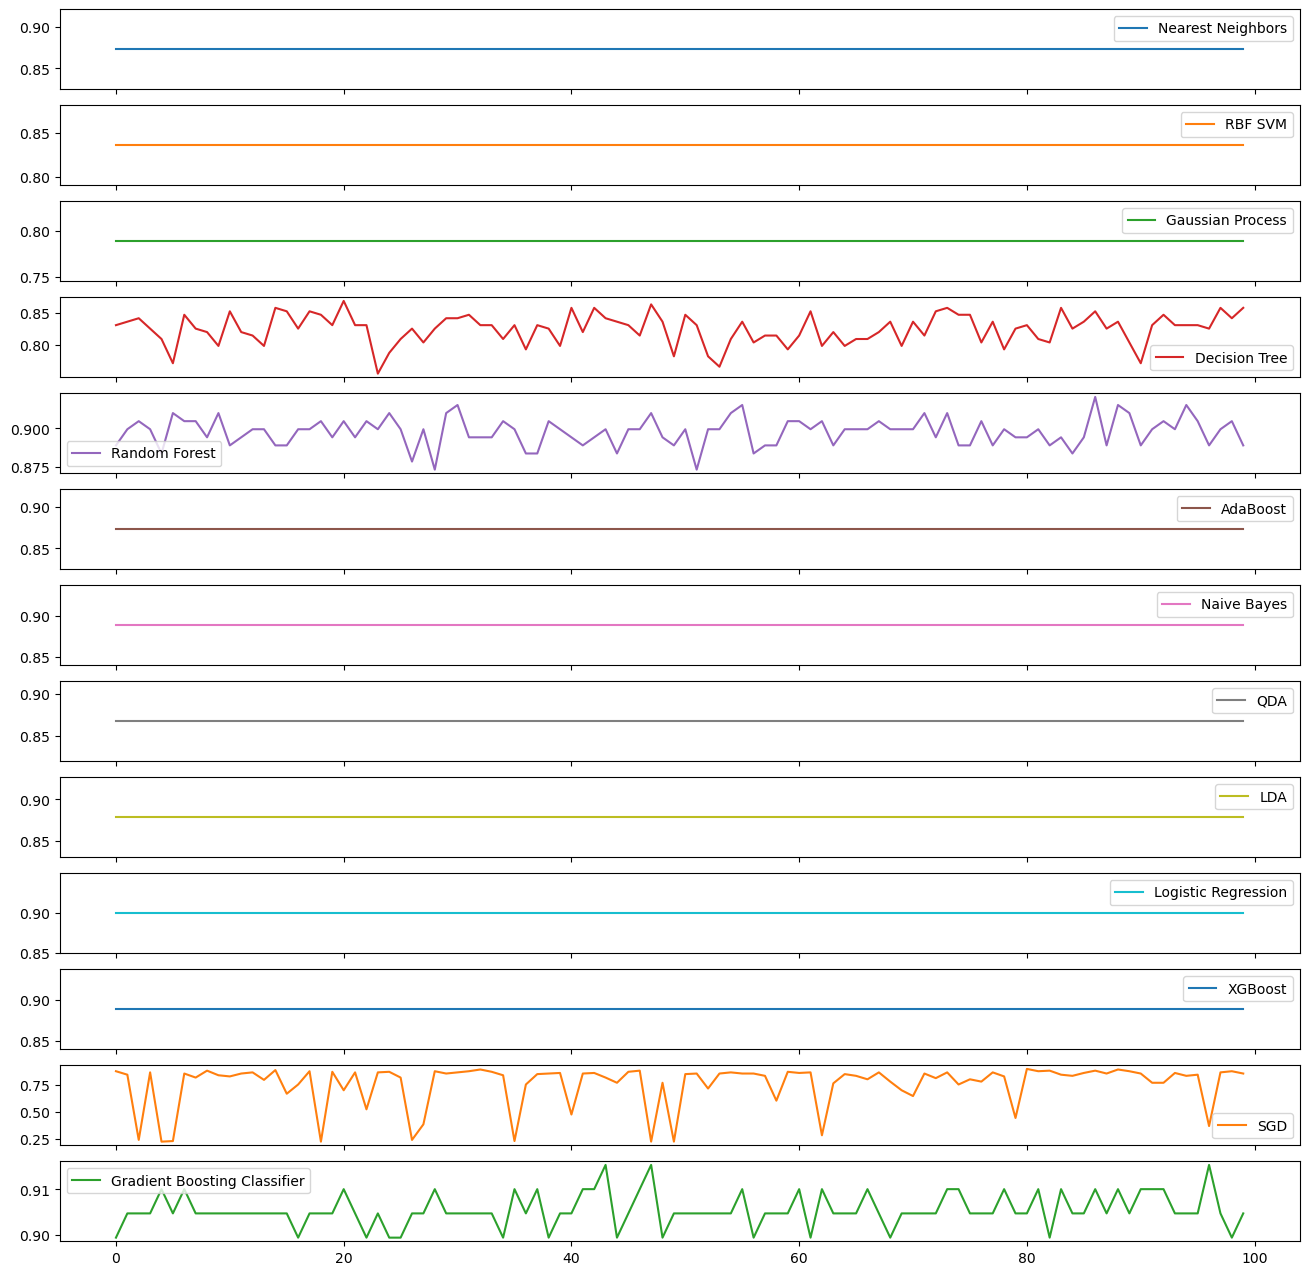

In [15]:
my_df = pd.DataFrame(data=results, columns=names)
my_df.plot(subplots=True, layout=(13,1), figsize=(16,16))

To compare classifier scores, we plot them to a single plot.

<AxesSubplot:>

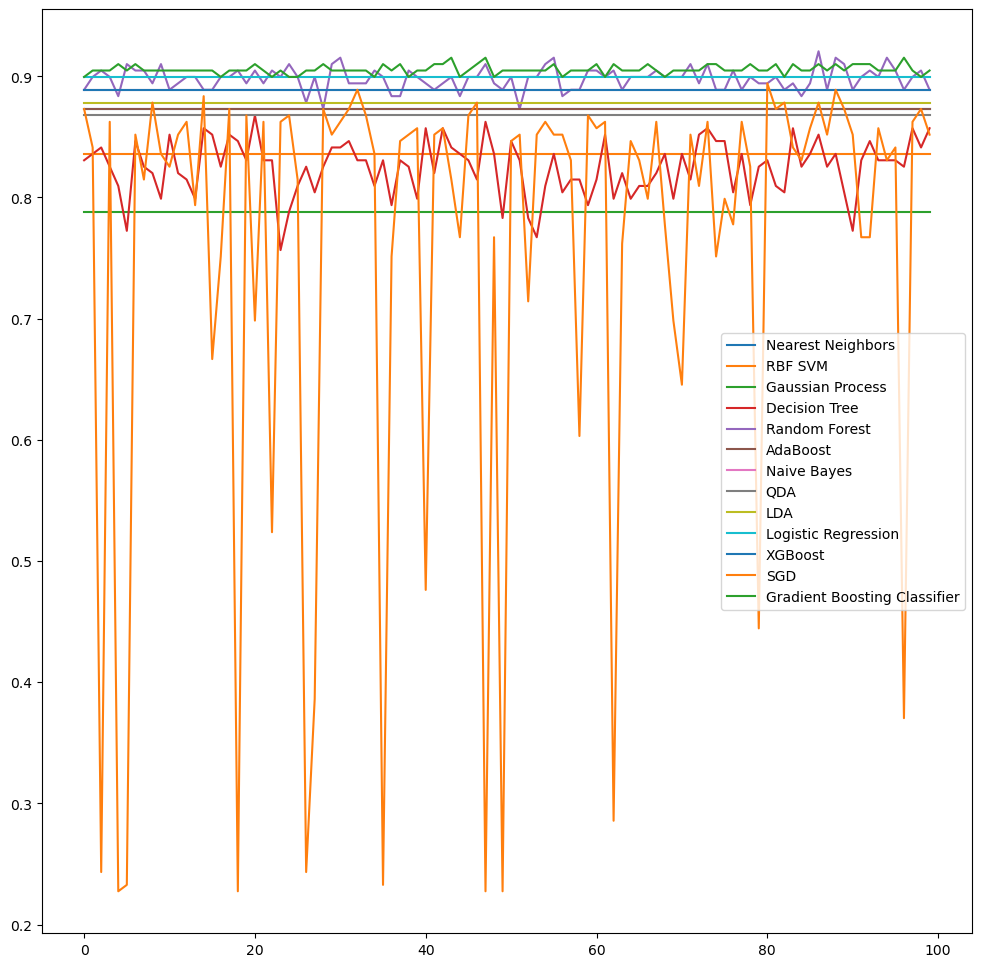

In [16]:
my_df.plot(figsize=(12,12))

<AxesSubplot:>

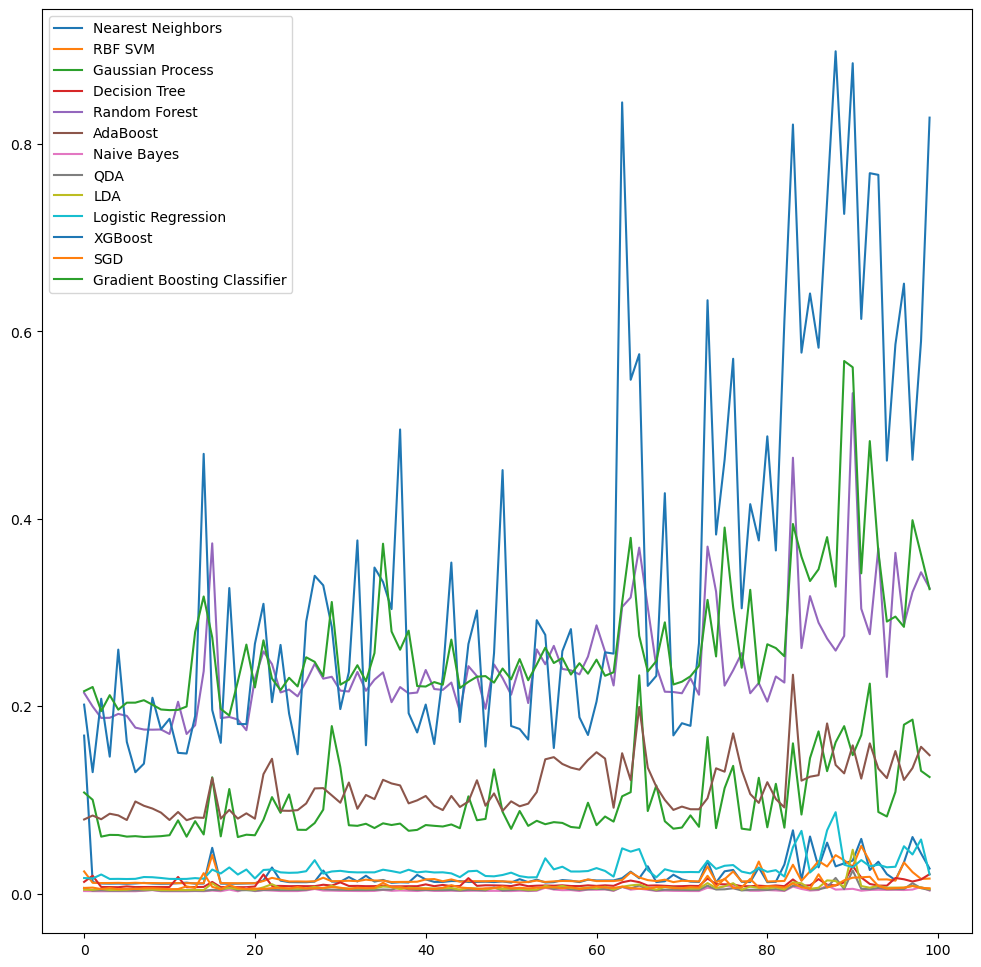

In [17]:
time_df = pd.DataFrame(data=time_result, columns=names)
time_df.plot(figsize=(12,12))

# How long one run took on average

In [18]:
time_mean_results = []
for key in names:
    mean = np.array(time_result[key]).mean()
    time_mean_results.append(mean)
    
timeMeanDf = pd.DataFrame(data=[time_mean_results], columns=names).T.sort_values(by=0, ascending=False)
timeMeanDf

,0
XGBoost,0.346728
Gradient Boosting Classifier,0.267878
Random Forest,0.244842
AdaBoost,0.112606
Gaussian Process,0.094980
Logistic Regression,0.026252
Nearest Neighbors,0.020244
RBF SVM,0.016249
Decision Tree,0.009731
SGD,0.007237


... median

In [19]:
time_median_results = []
for key in names:
    median = np.median(time_result[key])
    time_median_results.append(median)
    
timemedianDf = pd.DataFrame(data=[time_median_results], columns=names).T.sort_values(by=0, ascending=False)
timemedianDf

,0
XGBoost,0.266931
Gradient Boosting Classifier,0.245163
Random Forest,0.229881
AdaBoost,0.104481
Gaussian Process,0.077188
Logistic Regression,0.023439
RBF SVM,0.013277
Nearest Neighbors,0.013007
Decision Tree,0.008296
SGD,0.006108


# How long 100 iterations took per classifier

In [20]:
time_sum_results = []
for key in names:
    summed = np.array(time_result[key]).sum()
    time_sum_results.append(summed)
    
timeSumDf = pd.DataFrame(data=[time_sum_results], columns=names).T.sort_values(by=0, ascending=False)
timeSumDf

,0
XGBoost,34.672768
Gradient Boosting Classifier,26.787841
Random Forest,24.484237
AdaBoost,11.260596
Gaussian Process,9.497996
Logistic Regression,2.625207
Nearest Neighbors,2.024382
RBF SVM,1.624936
Decision Tree,0.973110
SGD,0.723666


# Average accuracy of each classifier based on 100 runs

In [21]:
mean_results = []
for key in names:
    mean = np.array(results[key]).mean()
    mean_results.append(mean)
    
meanDf = pd.DataFrame(data=[mean_results], columns=names).T.sort_values(by=0, ascending=False)
meanDf

,0
Gradient Boosting Classifier,0.905556
Logistic Regression,0.899471
Random Forest,0.897831
Naive Bayes,0.888889
XGBoost,0.888889
LDA,0.878307
Nearest Neighbors,0.873016
AdaBoost,0.873016
QDA,0.867725
RBF SVM,0.835979


# Median accuracy of each classifier based on 100 runs

In [22]:
median_results = []
for key in names:
    median = np.median(results[key])
    median_results.append(median)
    
medianDf = pd.DataFrame(data=[median_results], columns=names).T.sort_values(by=0, ascending=False)
medianDf

,0
Gradient Boosting Classifier,0.904762
Random Forest,0.899471
Logistic Regression,0.899471
Naive Bayes,0.888889
XGBoost,0.888889
LDA,0.878307
Nearest Neighbors,0.873016
AdaBoost,0.873016
QDA,0.867725
SGD,0.846561


## Results

When looking only accuracies, it seems that the best performing classifier is Gradient Boosting Classifier - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html. But what about runtime?  
Next, we are going to rank classifers based on how they ranked in accuracy and runtime leaderboards. The higher the accuracy, the higher the rank. The lower the runtime, the higher the rank.

In [44]:
runtime_df = timeMeanDf.copy()
runtime_df['runtime_rank'] = list(reversed(range(1, len(runtime_df) + 1))) # here higher runtime is worse, so we reverse
runtime_df.rename( columns={0 :'runtime'}, inplace=True )
runtime_df.index.name = 'Classifier'

accuracy_df = meanDf.copy()
accuracy_df['accuracy_rank'] = range(1, len(accuracy_df) + 1)
accuracy_df.rename( columns={0 :'accuracy'}, inplace=True )
accuracy_df.index.name = 'Classifier'


df_merged = pd.merge(runtime_df, accuracy_df, how='inner', on = 'Classifier')
df_merged['total_rank'] = df_merged.apply(lambda row: row.runtime_rank + row.accuracy_rank, axis=1)
df_merged['total_rank'] = df_merged['total_rank'].astype('int')
df_merged = df_merged.sort_values(by=['total_rank'])
df_merged = df_merged.reset_index(level=0)
df_merged

,Classifier,runtime,runtime_rank,accuracy,accuracy_rank,total_rank
0,LDA,0.005883,3,0.910256,2,5
1,QDA,0.004948,2,0.871795,7,9
2,Naive Bayes,0.003738,1,0.865385,9,10
3,Logistic Regression,0.025621,7,0.884615,5,12
4,Gradient Boosting Classifier,0.221434,12,0.918974,1,13
5,AdaBoost,0.101005,10,0.884615,4,14
6,Random Forest,0.229766,13,0.906987,3,16
7,RBF SVM,0.012929,6,0.833333,10,16
8,Decision Tree,0.010410,4,0.807115,12,16
9,XGBoost,0.150309,11,0.884615,6,17


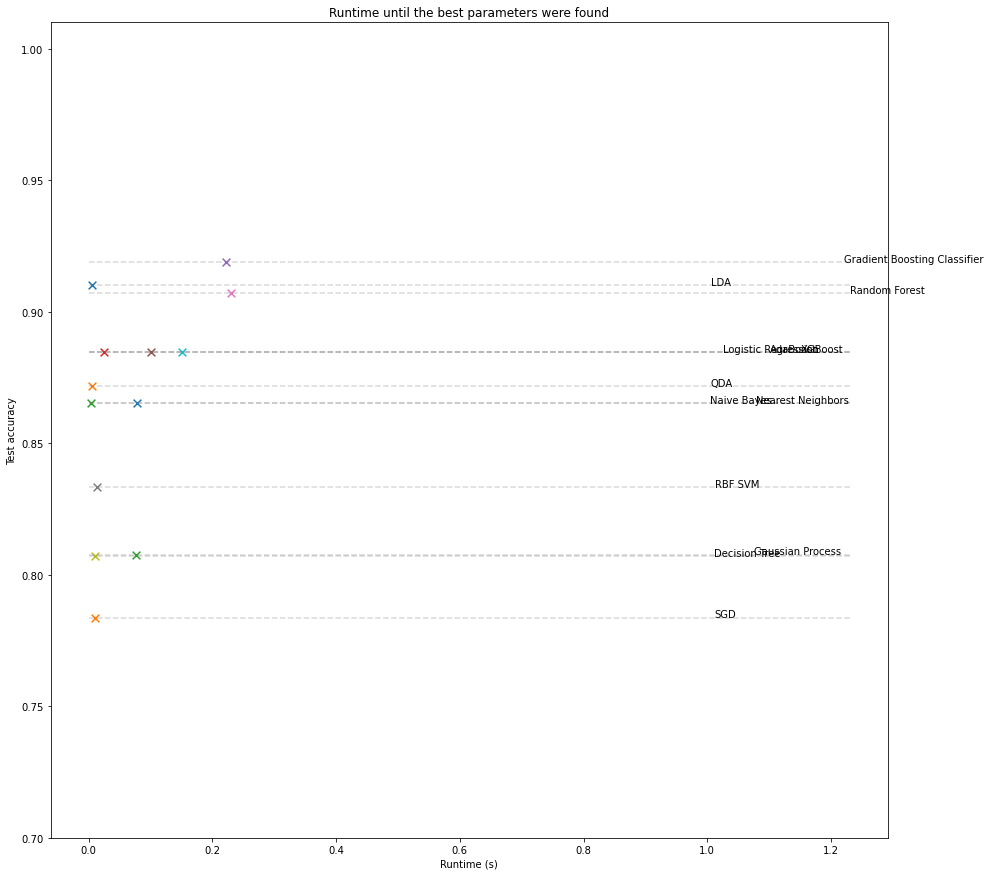

In [48]:
plt.figure(figsize = [15, 15])

for i in range(len(df_merged)):
    # Add classifier values
    plt.scatter(df_merged['runtime'][i], 
            df_merged['accuracy'][i], 
            label = df_merged['Classifier'][i],
               marker = 'x',
               s = 60)
    # Add a dashed lined marking the best accuracy threshold for classifier
    plt.hlines(y = df_merged['accuracy'][i], 
               xmin=0, 
               xmax = np.max(df_merged['runtime'])+1,
              linestyles = 'dashed', alpha = 0.3, color = 'grey')
    # Add classifier name
    plt.annotate(df_merged['Classifier'][i], 
                 (df_merged['runtime'][i]+1, 
                  df_merged['accuracy'][i]),
                )
plt.ylim(bottom = 0.70, top = 1.01)
plt.xlabel('Runtime (s)')
plt.ylabel('Test accuracy')
plt.title('Runtime until the best parameters were found')
plt.show();

So, even though Gradient Boosting Classifer achieved the accuracy of 0.918974, the LDA classifer performed only 1% worse (0.008 points), but achieved the result 37.6 times faster (0.221434/0.005883). 